In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial fit 

This is a toy problem where we fit a quadratic function on a polynomial to find the coefficients of the quadratic function. The underlying function for which we are trying to compute the fit is $4 - t + \frac{1}{2}t^2$.

In [4]:
def polynomial(t,v=-1,a=1):
    """
    METHOD: this function outputs 4-t+0.5t^2 for an array of supplied t values

    INPUT: 
    ------
    t: values of time (numpy array)
    a: acceleration value (float)
    v: initial velocity (float)
    
    OUTPUT: 
    -------
    returns the value of the polynomial
    """
    return 4 + v*t + (0.5*a*t**2)

### Plotting to check the true function and a trial function with different value of the coefficient

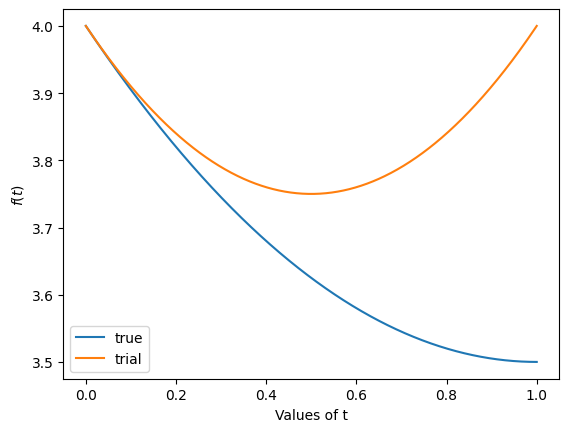

In [5]:
times = np.linspace(0,1,1000)
x_vals_true = polynomial(times)
plt.plot(times, x_vals_true, label = "true")
plt.plot(times, polynomial(times,a=2,v=-1), label = "trial")
plt.xlabel('Values of t')
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

In [21]:
def fitting(a_low, a_hi, v_low, v_hi, N):
    """
    METHOD: This function accepts the bounds of the `a` and `v` and the total number of grid points,
    constructs a grid on both the variables, and computes the fit of the polynomial function.

    INPUT:
    ------
    a_low: lowest range of acceleration value
    a_hi: highest range of acceleration value
    v_low: lowest range of velocity value
    v_hi: highest range of velocity value
    N:

    OUTPUT:
    Returns the rms array and the best fit point.
    """
    a = np.linspace(a_low, a_hi,N)
    v = np.linspace(v_low, v_hi,N)
    rms = []
    grid_points = []
    for v_val in v:
        for a_val in a:
            x_trial = polynomial(times, v=v_val, a=a_val)
            diff = x_vals_true - x_trial
            rms.append(np.sqrt(np.mean(diff**2)))
            grid_points.append((a_val, v_val))
    rms = np.array(rms)
    a_fit, v_fit = grid_points[np.argmin(rms)]  
    return (a_fit, v_fit, rms, grid_points)

In [22]:
fitting(-1,1,-4,4,500)

(1.0,
 -1.0020040080160322,
 array([2.16871006, 2.16783125, 2.16695244, ..., 2.88573688, 2.88660526,
        2.88747367]),
 [(-1.0, -4.0),
  (-0.9959919839679359, -4.0),
  (-0.9919839679358717, -4.0),
  (-0.9879759519038076, -4.0),
  (-0.9839679358717435, -4.0),
  (-0.9799599198396793, -4.0),
  (-0.9759519038076152, -4.0),
  (-0.9719438877755511, -4.0),
  (-0.9679358717434869, -4.0),
  (-0.9639278557114228, -4.0),
  (-0.9599198396793587, -4.0),
  (-0.9559118236472945, -4.0),
  (-0.9519038076152304, -4.0),
  (-0.9478957915831663, -4.0),
  (-0.9438877755511023, -4.0),
  (-0.9398797595190381, -4.0),
  (-0.935871743486974, -4.0),
  (-0.9318637274549099, -4.0),
  (-0.9278557114228457, -4.0),
  (-0.9238476953907816, -4.0),
  (-0.9198396793587175, -4.0),
  (-0.9158316633266533, -4.0),
  (-0.9118236472945892, -4.0),
  (-0.9078156312625251, -4.0),
  (-0.9038076152304609, -4.0),
  (-0.8997995991983968, -4.0),
  (-0.8957915831663327, -4.0),
  (-0.8917835671342685, -4.0),
  (-0.8877755511022044, -

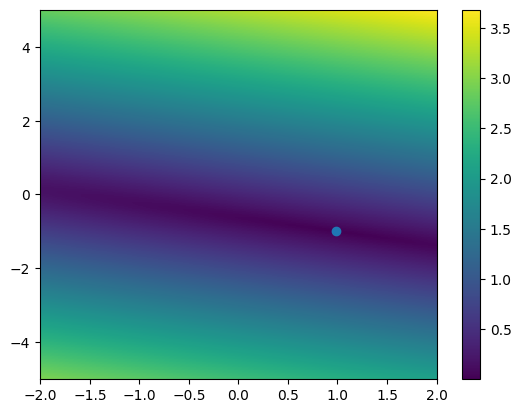

In [32]:
def plotting(a_fit, v_fit, rms, grid_points):
    """
    Plots the RMS array as a colormap.
    
    INPUT:
    ------
    a_fit: Best-fit acceleration
    v_fit: Best-fit velocity
    rms: Root mean square array
    grid_points: List of grid points

    OUTPUT: colormap
    """
    A, V = np.meshgrid(a_fit, v_fit)
    rms_grid = rms.reshape((len(a_fit), len(v_fit)))
    plt.pcolormesh(A, V, rms_grid)
    plt.colorbar()
    plt.scatter(grid_points[np.argmin(rms)][0], grid_points[np.argmin(rms)][1])
    plt.show()

a_fit, v_fit, rms, grid_points = fitting(a_low, a_hi, v_low, v_hi, N)
plot_results(np.linspace(a_low, a_hi, N), np.linspace(v_low, v_hi, N), rms, grid_points)